✅ Top Frequent Itemsets:
   support                        itemsets
1    0.080  (bulk grains rice dried goods)
6    0.080                 (juice nectars)
0    0.055  (bulk dried fruits vegetables)
9    0.055               (packaged cheese)
4    0.055                  (fresh fruits)
5    0.055                       (granola)
8    0.055        (nuts seeds dried fruit)
2    0.050                 (dog food care)
3    0.050    (doughs gelatins bake mixes)
7    0.050                  (latino foods)

✅ Strong Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


<ipython-input-16-6262ba10733b>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='support', y='itemsets', data=frequent_itemsets.head(10), palette='Blues_r')


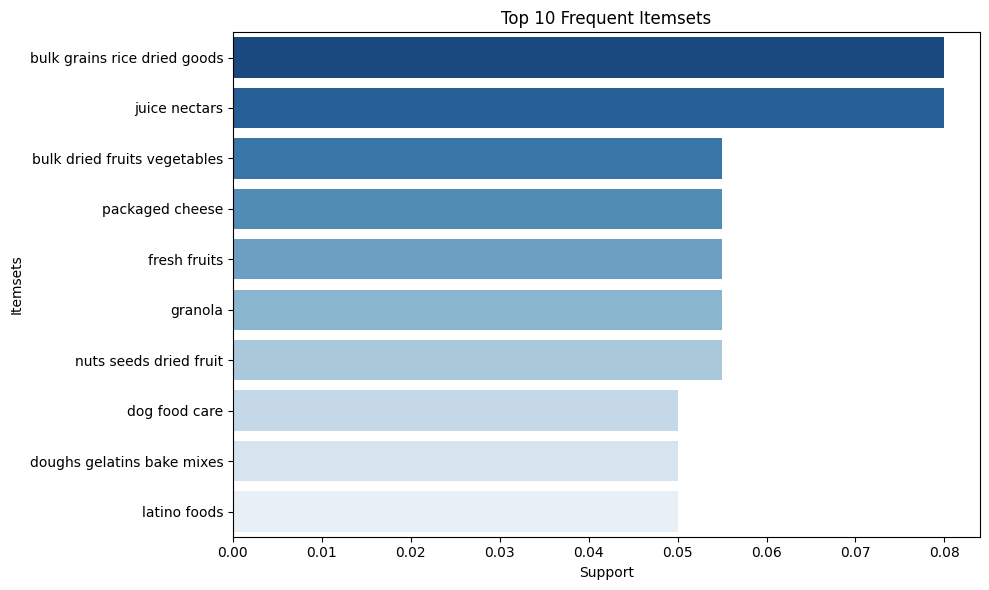

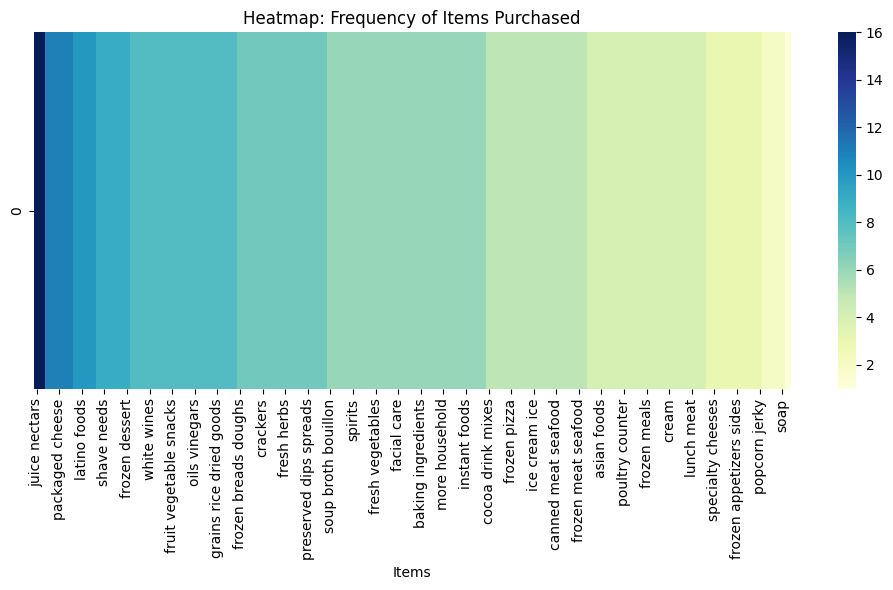

<ipython-input-16-6262ba10733b>:76: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=rules, x='support', y='confidence', size='lift', hue='lift',


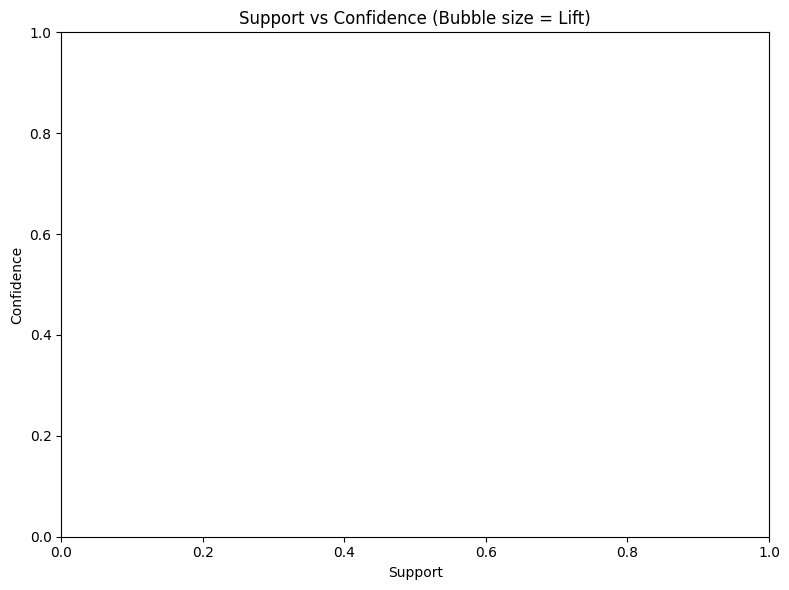

In [16]:
# 📦 Step 1: Import required libraries
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# 🎯 Step 2: Load dataset
aisles_df = pd.read_csv('/10. Market Basket Analysis.csv')
item_list = aisles_df['aisle'].tolist()

# 🛒 Step 3: Create random simulated transactions
random.seed(42)
transactions = []
for _ in range(200):
    basket = random.sample(item_list, random.randint(2, 6))
    transactions.append(basket)

# 🔄 Step 4: One-hot encode the data
te = TransactionEncoder()
df_encoded = pd.DataFrame(te.fit_transform(transactions), columns=te.columns_)

# 📊 Step 5: Run Apriori
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)

# ✅ Step 6: If itemsets found, generate rules and plot
if frequent_itemsets.empty:
    print("⚠️ No frequent itemsets found. Try lowering min_support.")
else:
    frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
    rules = rules[rules['lift'] >= 1.2]

    print("✅ Top Frequent Itemsets:")
    print(frequent_itemsets.head(10))

    print("\n✅ Strong Association Rules:")
    print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

    # 📊 Bar Plot for top itemsets
    frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(lambda x: ', '.join(list(x)))
    plt.figure(figsize=(10,6))
    sns.barplot(x='support', y='itemsets', data=frequent_itemsets.head(10), palette='Blues_r')
    plt.title('Top 10 Frequent Itemsets')
    plt.xlabel('Support')
    plt.ylabel('Itemsets')
    plt.tight_layout()
    plt.show()

    # 🔥 Heatmap 1: Item Frequency Heatmap
    item_frequency = df_encoded.sum().sort_values(ascending=False)
    plt.figure(figsize=(10,6))
    sns.heatmap(pd.DataFrame(item_frequency).T, cmap="YlGnBu", cbar=True, annot=False)
    plt.title('Heatmap: Frequency of Items Purchased')
    plt.xlabel('Items')
    plt.tight_layout()
    plt.show()

    # 🔥 Heatmap 2: Association Rules Lift
    if not rules.empty:
        heatmap_data = rules.pivot_table(index='antecedents', columns='consequents', values='lift')
        heatmap_data.columns = heatmap_data.columns.map(lambda x: ', '.join(list(x)))
        heatmap_data.index = heatmap_data.index.map(lambda x: ', '.join(list(x)))

        plt.figure(figsize=(10, 6))
        sns.heatmap(heatmap_data.fillna(0), cmap='coolwarm', annot=True, fmt=".2f")
        plt.title('Heatmap: Lift between Product Pairs')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

    # ⚡ Scatter plot: Support vs Confidence
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=rules, x='support', y='confidence', size='lift', hue='lift',
                    palette='viridis', sizes=(40, 200))
    plt.title('Support vs Confidence (Bubble size = Lift)')
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.tight_layout()
    plt.show()
